# Import stuff

In [10]:
import pandas as pd
import numpy as np
import os

# Read in the data

In [2]:
# Load the data
def read_visits(shards=range(3)):
    """
    Args:
      shards:  A subset of the integers 0-9, indicating which data shards
        should be read in.

    Returns:
      A pandas DataFrame
    """
    data = pd.DataFrame()
    dname = "/Users/stevescott/Downloads/demographics"
    for which_part in shards:
        fname = f"part-00000000000{which_part}.csv.gz"
        fname = os.path.join(dname, fname)
        print(f"reading {fname}")
        shard = pd.read_csv(fname)
        data = data.append(shard)
    return data


In [3]:
data = read_visits([0, 1, 2])

reading /Users/stevescott/Downloads/demographics/part-000000000000.csv.gz
reading /Users/stevescott/Downloads/demographics/part-000000000001.csv.gz
reading /Users/stevescott/Downloads/demographics/part-000000000002.csv.gz


In [4]:
data.head()

,estid,domain,visits
0,ZGYACGF9RJ4AAAAIdO2GAw==,horoscope.com,15
1,ZGQAAmENPcgAAAAICZmvAw==,channel3000.com,52
2,ZHkACmAJyx8AAAAID63uAw==,coingecko.com,81
3,ZGMAAmBXdOUAAAAIQM2RAw==,mentalfloss.com,69
4,ZGYAB2BeFlwAAAAIHXHqAw==,obits.cleveland.com,13


In [5]:
data = data.sort_values("visits", ascending=False)
data.head()

,estid,domain,visits
95184,ZGwAB2EdKZsAAAAIF0RUAw==,vmodtech.com,155195
65334,ZHyAAmFejEIAAAAIF7S9Aw==,legacy.com,17569
9316,ZGYAAWGA+9kAAAAIDYEjAw==,jump.mingpao.com,7300
41076,ZGgACGE7dJgAAAAID4TaAw==,coingecko.com,3733
58208,ZHUAA2FoUNUAAAAIETzpAw==,debeurs.nl,3228


In [6]:
# Get the number of times each estid appears in the data.
unique_visit_counts = data.value_counts("estid")

In [7]:
unique_visit_counts.head()

estid
ZG0ACGGAKdwAAAAKfIzqAw==    12
ZHMABGF96Q0AAAAINmC8Aw==    11
ZHsABGGAHmUAAAAIBU2DAw==    11
ZGUAAmGASFYAAAAJBCz5Aw==    11
ZGEABGGAxocAAAAIf2E0Aw==    11
dtype: int64

In [13]:
# This is the number of times we saw an estid once, twice, ...
unique_visit_counts.value_counts().sort_index()

1     6746290
2      118259
3        5034
4         510
5          94
6          42
7          31
8          10
9           8
10          6
11          6
12          1
dtype: int64

In [23]:
# Check out the guy who showed up to 12 different domains.
data[data.estid=="ZG0ACGGAKdwAAAAKfIzqAw=="]

,estid,domain,visits
2173008,ZG0ACGGAKdwAAAAKfIzqAw==,lamag.com,5
2125933,ZG0ACGGAKdwAAAAKfIzqAw==,robbreport.com,4
2032644,ZG0ACGGAKdwAAAAKfIzqAw==,revolvermag.com,4
2078504,ZG0ACGGAKdwAAAAKfIzqAw==,fwtx.com,4
2016578,ZG0ACGGAKdwAAAAKfIzqAw==,theeastsiderla.com,3
1645139,ZG0ACGGAKdwAAAAKfIzqAw==,equibase.com,2
1579413,ZG0ACGGAKdwAAAAKfIzqAw==,awwa.org,2
1702397,ZG0ACGGAKdwAAAAKfIzqAw==,wfmz.com,2
923316,ZG0ACGGAKdwAAAAKfIzqAw==,toptenreviews.com,1
337728,ZG0ACGGAKdwAAAAKfIzqAw==,texasmonthly.com,1


<AxesSubplot:>

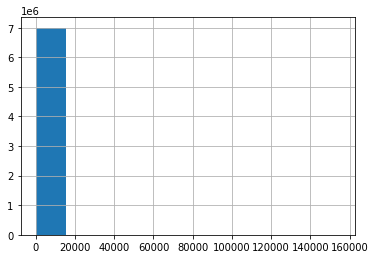

In [8]:
data.visits.hist()

<AxesSubplot:>

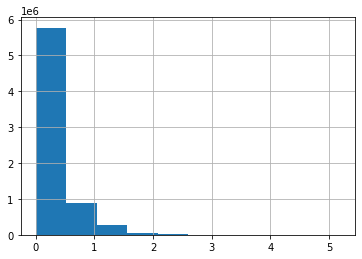

In [12]:
np.log10(data.visits).hist()

In [15]:
total_visits_by_estid = data.loc[:, ("estid", "visits")].groupby("estid").sum()



In [25]:
total_visits_by_estid.sort_values("visits", ascending=False)

,visits
estid,
ZGwAB2EdKZsAAAAIF0RUAw==,155195
ZHyAAmFejEIAAAAIF7S9Aw==,26942
ZGYAAWGA+9kAAAAIDYEjAw==,7300
ZGgACGE7dJgAAAAID4TaAw==,3733
ZHUAA2FoUNUAAAAIETzpAw==,3228
...,...
ZGYAAGFzVugAAAAIawPwAw==,1
ZGYAAGFzVr4AAAAIav5TAw==,1
ZGYAAGFzVqwAAAAIFQ0XAw==,1


## Check out the ID's with many visits.  How many sites do they visit?  Usually just one.

In [34]:
data[data.estid=="ZGYAAWGA+9kAAAAIDYEjAw=="]

,estid,domain,visits
9316,ZGYAAWGA+9kAAAAIDYEjAw==,jump.mingpao.com,7300


In [35]:
data[data.estid=="ZGgACGE7dJgAAAAID4TaAw=="]

,estid,domain,visits
41076,ZGgACGE7dJgAAAAID4TaAw==,coingecko.com,3733
